In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment_analysis.csv')

In [10]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data preprocessing

In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7915,False
7916,False
7917,False
7918,False


In [14]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


### Text preprocessing

In [15]:
import re 
import string

#### Convert uppercase to lowercase

In [18]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [19]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test https://goo.gl/h1...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


#### Remove links

In [24]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r"http\S+|www\S+|https\S+", "", word, flags=re.MULTILINE) for word in x.split()))

In [25]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test #android #apps #...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


#### Remove punctuations

In [26]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [27]:
data["tweet"].head(5)

,tweet
0,fingerprint pregnancy test android apps beaut...
1,finally a transparant silicon case thanks to ...
2,we love this would you go talk makememories un...
3,im wired i know im george i was made that way ...
4,what amazing service apple wont even talk to m...


#### Remove numbers

In [28]:
data["tweet"]= data['tweet'].str.replace('\d+','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2311543941.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"]= data['tweet'].str.replace('\d+','', regex=True)


In [29]:
data["tweet"].tail(5)

,tweet
7915,live out loud lol liveoutloud selfie smile son...
7916,we would like to wish you an amazing day make ...
7917,helping my lovely year old neighbor with her ...
7918,finally got my smart pocket wifi stay connecte...
7919,apple barcelona apple store bcn barcelona trav...


#### Remove stopwords

In [30]:
import nltk

In [37]:
nltk.download('stopwords', download_dir='/content/drive/MyDrive/Colab Notebooks')

[nltk_data] Downloading package stopwords to
[nltk_data]     /content/drive/MyDrive/Colab Notebooks...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
with open('/content/drive/MyDrive/Colab Notebooks/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [39]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [41]:
data["tweet"].head()

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love thi would go talk makememori unplug relax...
3,im wire know im georg wa made way iphon cute d...
4,amaz servic appl wont even talk question unles...


#### Stemming

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

### Building Vacabulary

In [42]:
from collections import Counter
vocab = Counter()

In [43]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [44]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'thi': 678,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'wa': 141,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51

In [47]:
len(vocab)

15880

In [45]:
tokens = [key for key in vocab if vocab[key] > 10]

In [46]:
len(tokens)

1152

In [48]:
def save_vocab(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

In [49]:
save_vocab(tokens, '/content/drive/MyDrive/Colab Notebooks/vocabulary.txt')

### Divide dataset

In [50]:
x = data["tweet"]
y = data["label"]

In [51]:
x

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love thi would go talk makememori unplug relax...
3,im wire know im georg wa made way iphon cute d...
4,amaz servic appl wont even talk question unles...
...,...
7915,live loud lol liveoutloud selfi smile soni mus...
7916,would like wish amaz day make everi minut coun...
7917,help love year old neighbor ipad thi morn ha m...
7918,final got smart pocket wifi stay connect anyti...


In [52]:
y

,label
0,0
1,0
2,0
3,0
4,1
...,...
7915,0
7916,0
7917,0
7918,0


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
x_train.shape

(6336,)

In [55]:
x_test.shape

(1584,)

In [56]:
y_train.shape

(6336,)

In [57]:
y_test.shape

(1584,)

### Vectorization

In [58]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))  
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split(): 
                sentence_list[i] = 1 
        
        vectorized_list.append(sentence_list) 
    
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [59]:
vectorized_x_train = vectorizer(x_train, tokens)

In [63]:
vectorized_x_test = vectorizer(x_test, tokens)

In [65]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_train

,label
863,0
2403,0
1196,0
6545,0
3942,0
...,...
5258,0
6909,0
2659,0
2504,0


In [67]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_test

,label
7566,0
3669,0
527,0
375,0
969,0
...,...
5398,1
1898,0
1766,0
2717,0


In [69]:
y_train.value_counts()

,count
label,
0,4719
1,1617


([<matplotlib.patches.Wedge at 0x781250a74cb0>,
 [Text(-0.7649869293651724, 0.7904397496966135, 'Positive'),
  Text(0.764987375378535, -0.7904393180450101, 'Negative')])

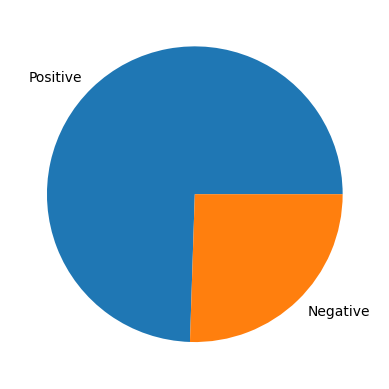

In [70]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])

### Handle inbalanced dataset

In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9438, 1152) (9438,)


In [72]:
y_train_smote.value_counts()

,count
label,
0,4719
1,4719


([<matplotlib.patches.Wedge at 0x78124b48c560>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Negative')])

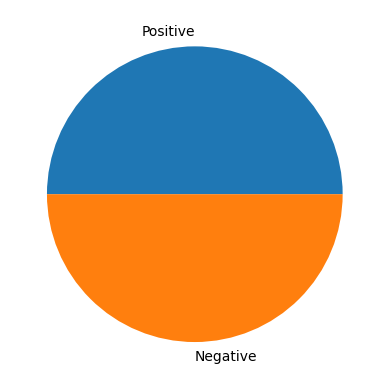

In [73]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])

In [74]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
y_train_smote

,label
0,0
1,0
2,0
3,0
4,0
...,...
9433,1
9434,1
9435,1
9436,1


In [77]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_test

,label
7566,0
3669,0
527,0
375,0
969,0
...,...
5398,1
1898,0
1766,0
2717,0


## Model Training and Evaluation

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")


### Logistic Regression

In [81]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [82]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [83]:
y_train_pred

array([0, 0, 1, ..., 1, 1, 1])

In [84]:
y_train_smote

,label
0,0
1,0
2,0
3,0
4,0
...,...
9433,1
9434,1
9435,1
9436,1


In [85]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.944
	Precision = 0.923
	Recall = 0.968
	F1-Score = 0.945


In [86]:
y_test_pred = lr.predict(vectorized_x_test)

In [87]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.874
	Precision = 0.733
	Recall = 0.807
	F1-Score = 0.768


### Naive Bayes

In [88]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.868
	Recall = 0.96
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.878
	Precision = 0.705
	Recall = 0.907
	F1-Score = 0.794


### Decision Tree

In [92]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.831
	Precision = 0.668
	Recall = 0.689
	F1-Score = 0.679


### RandomForest

In [90]:
fr = RandomForestClassifier()
fr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = fr.predict(vectorized_x_train_smote)

y_test_pred = fr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.883
	Precision = 0.811
	Recall = 0.714
	F1-Score = 0.759


### SVM

In [91]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.982
	Precision = 0.967
	Recall = 0.997
	F1-Score = 0.982
Testing Scores:
	Accuracy = 0.884
	Precision = 0.765
	Recall = 0.795
	F1-Score = 0.779


In [93]:
import pickle

In [94]:
with open('/content/drive/MyDrive/Colab Notebooks/model.pickle', 'wb') as file:
    [pickle.dump(lr, file)]

In [95]:
with open('/content/drive/MyDrive/Colab Notebooks/model1.pickle', 'wb') as file:
    [pickle.dump(mnb, file)]

In [96]:
with open('/content/drive/MyDrive/Colab Notebooks/model2.pickle', 'wb') as file:
    [pickle.dump(dt, file)]